In [4]:
# The following Python code will download the CSV data from the given URL and then integrate it into the plot.
# Please note, to execute this code, you would need an environment where you can access external URLs.

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# URL of the dataset (provided by the user)
data_url = "https://sites.ecmwf.int/data/c3sci/bulletin/202401/press_release/era5_daily_surface_temperature_global_1940-2024.csv"

data = pd.read_csv(data_url, comment='#')



/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/tmp/ipykernel_4282/1997221828.py:15: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(numeric_years, yearly_averages['ano_91-20'], 50)


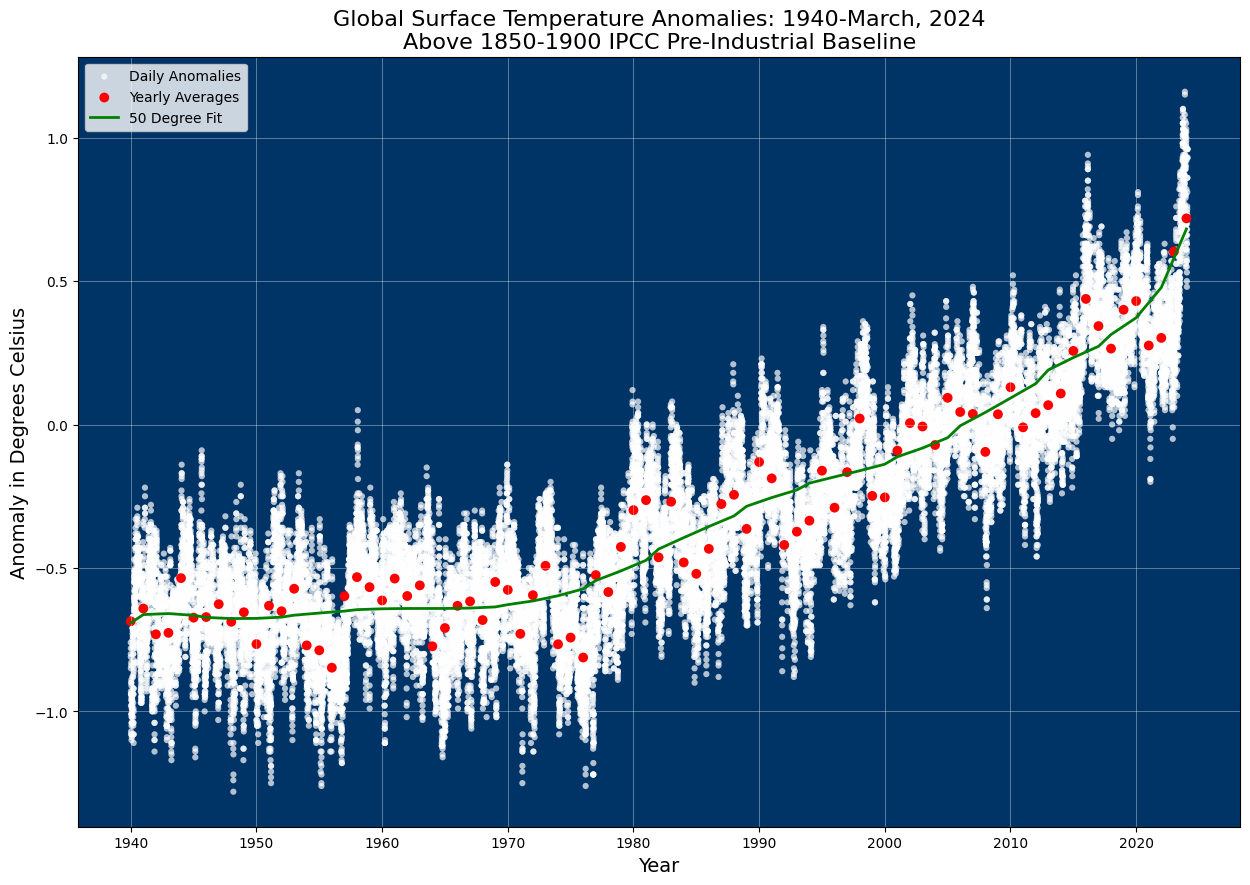

In [22]:
# Convert the 'date' column to datetime and extract the year
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

# Calculate the yearly average anomalies
yearly_averages = data.groupby('year')['ano_91-20'].mean().reset_index()

# Convert the 'year' column from integers to datetime objects representing the first day of each year
yearly_averages['year'] = pd.to_datetime(yearly_averages['year'], format='%Y')

# Extract the year as a separate numeric value for fitting
numeric_years = yearly_averages['year'].dt.year

# Fit a 3rd degree polynomial to the yearly averages
coefficients = np.polyfit(numeric_years, yearly_averages['ano_91-20'], 50)
polynomial = np.poly1d(coefficients)

# Generate x values (years) for the polynomial line
x_poly = np.linspace(numeric_years.min(), numeric_years.max(), num=50)  # More points for a smoother line

# Generate y values (fitted values) for the polynomial line
y_poly = polynomial(x_poly)

# Plot the daily anomalies
plt.figure(figsize=(15, 10))
plt.scatter(data['date'], data['ano_91-20'], color='white', edgecolors='none', s=20, alpha=0.7, label='Daily Anomalies')

# Plot the yearly average anomalies
plt.scatter(yearly_averages['year'], yearly_averages['ano_91-20'], color='red', edgecolors='none', s=50, label='Yearly Averages')

# Plot the fitted 3rd degree polynomial line
# We need to convert the x_poly years back to datetime for plotting
poly_dates = [np.datetime64(f'{int(year)}-01-01') for year in x_poly]
plt.plot(poly_dates, y_poly, color='green', linewidth=2, label='50 Degree Fit')

# Title, labels, legend, and grid
plt.title('Global Surface Temperature Anomalies: 1940-March, 2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Anomaly in Degrees Celsius', fontsize=14)
plt.legend()
plt.grid(True, which='both', color='white', linestyle='-', linewidth=0.5, alpha=0.5)
plt.gca().set_facecolor('#003366')  # Dark blue background color

# Show the plot
plt.show()

In [14]:
y_poly

array([-0.65635848, -0.66058124, -0.66437246, -0.66773188, -0.67065925,
       -0.67315431, -0.6752168 , -0.67684646, -0.67804303, -0.67880626,
       -0.67913589, -0.67903166, -0.67849331, -0.67752059, -0.67611323,
       -0.67427098, -0.67199358, -0.66928078, -0.66613231, -0.66254791,
       -0.65852734, -0.65407032, -0.64917661, -0.64384594, -0.63807806,
       -0.63187271, -0.62522963, -0.61814857, -0.61062925, -0.60267144,
       -0.59427486, -0.58543927, -0.5761644 , -0.56644999, -0.5562958 ,
       -0.54570155, -0.53466699, -0.52319187, -0.51127592, -0.49891889,
       -0.48612052, -0.47288055, -0.45919873, -0.44507479, -0.43050848,
       -0.41549954, -0.40004771, -0.38415274, -0.36781436, -0.35103232,
       -0.33380636, -0.31613622, -0.29802165, -0.27946238, -0.26045817,
       -0.24100874, -0.22111384, -0.20077322, -0.17998662, -0.15875378,
       -0.13707443, -0.11494833, -0.09237521, -0.06935482, -0.0458869 ,
       -0.02197119,  0.00239256,  0.02720462,  0.05246525,  0.07

In [15]:
x_poly

array([1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021., 2022., 2023., 2024.])

In [16]:

# Convert the 'date' column to datetime and extract the year
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

# Calculate the yearly average anomalies
yearly_averages = data.groupby('year')['ano_91-20'].mean().reset_index()

# Convert the 'year' column from integers to datetime objects representing the first day of each year
yearly_averages['year'] = pd.to_datetime(yearly_averages['year'], format='%Y')

# Extract the year as a separate numeric value for fitting
numeric_years = yearly_averages['year'].dt.year

# Fit a 3rd degree polynomial to the yearly averages
coefficients = np.polyfit(numeric_years, yearly_averages['ano_91-20'], 3)
polynomial = np.poly1d(coefficients)

# Generate x values (years) for the polynomial line
x_poly = pd.to_datetime(yearly_averages['year'], format='%Y')

# Generate y values (fitted values) for the polynomial line
y_poly = polynomial(x_poly)

# Plot the daily anomalies
plt.figure(figsize=(15, 10))
plt.scatter(data['date'], data['ano_91-20'], color='white', edgecolors='none', s=20, alpha=0.7, label='Daily Anomalies')

# Plot the yearly average anomalies
plt.scatter(yearly_averages['year'], yearly_averages['ano_91-20'], color='red', edgecolors='none', s=50, label='Yearly Averages')

# Plot the fitted 3rd degree polynomial line
plt.plot(np.datetime64('{}-01-01'.format(int(x_poly[0])))+np.arange(len(x_poly)), y_poly, color='green', linewidth=2, label='3rd Degree Fit')

# Title, labels, legend, and grid
plt.title('Global Surface Temperature Anomalies: 1940-March, 2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Anomaly in Degrees Celsius', fontsize=14)
plt.legend()
plt.grid(True, which='both', color='white', linestyle='-', linewidth=0.5, alpha=0.5)
plt.gca().set_facecolor('#003366')  # Dark blue background color

# Show the plot
plt.show()

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

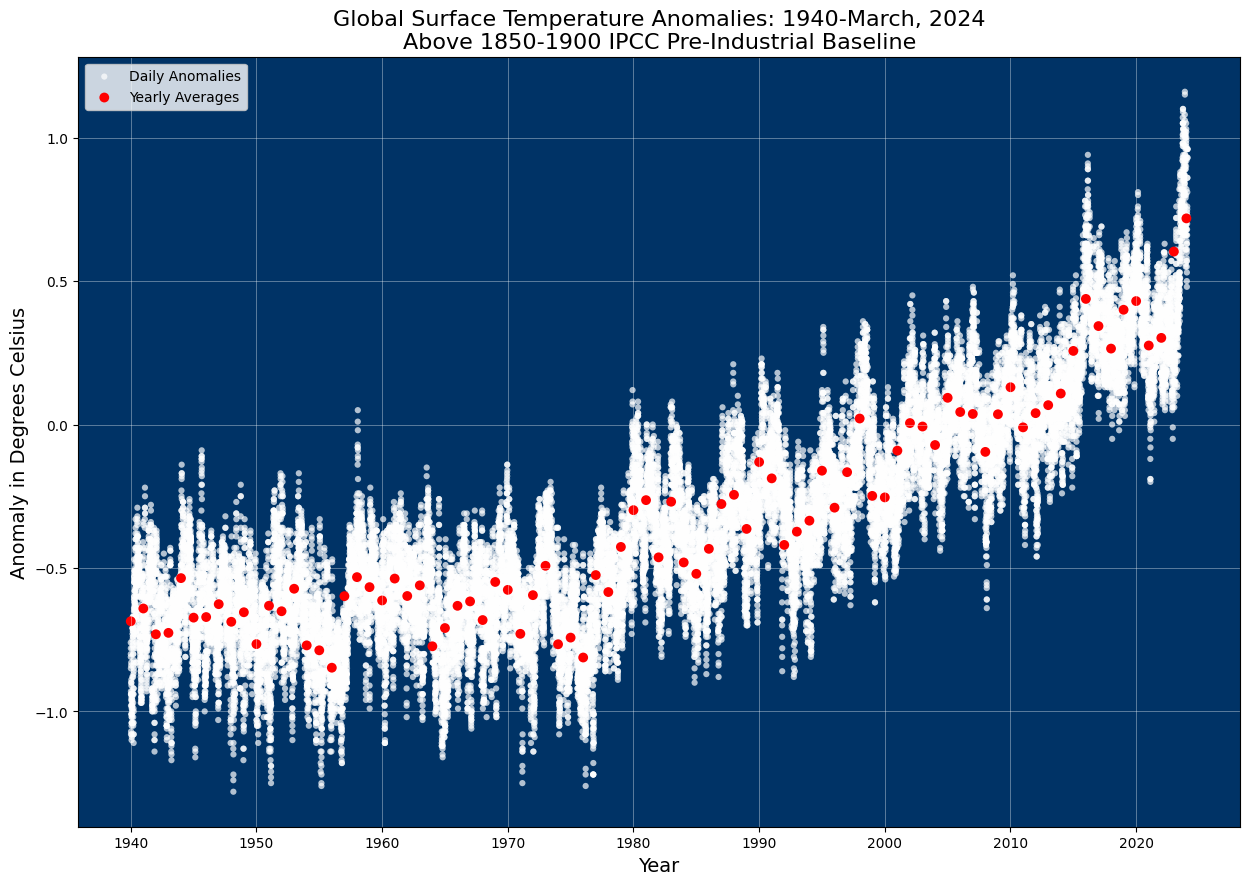

In [11]:
# Convert the 'date' column to datetime and extract the year
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

# Calculate the yearly average anomalies
yearly_averages = data.groupby('year')['ano_91-20'].mean().reset_index()

# Convert the 'year' column from integers to datetime objects representing the first day of each year
yearly_averages['year'] = pd.to_datetime(yearly_averages['year'], format='%Y')

# Plot the daily anomalies
plt.figure(figsize=(15, 10))
plt.scatter(data['date'], data['ano_91-20'], color='white', edgecolors='none', s=20, alpha=0.7, label='Daily Anomalies')

# Plot the yearly average anomalies
# Here, the x-values are datetime objects of the years, not integers
plt.scatter(yearly_averages['year'], yearly_averages['ano_91-20'], color='red', edgecolors='none', s=50, label='Yearly Averages')

# Title, labels, legend, and grid
plt.title('Global Surface Temperature Anomalies: 1940-March, 2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Anomaly in Degrees Celsius', fontsize=14)
plt.legend()
plt.grid(True, which='both', color='white', linestyle='-', linewidth=0.5, alpha=0.5)
plt.gca().set_facecolor('#003366')  # Dark blue background color

# Show the plot
plt.show()

In [10]:
yearly_averages.head(10)

,year,ano_91-20
0,1940,-0.685847
1,1941,-0.641315
2,1942,-0.731288
3,1943,-0.726274
4,1944,-0.535437
5,1945,-0.673178
6,1946,-0.671151
7,1947,-0.626219
8,1948,-0.687623
9,1949,-0.654411


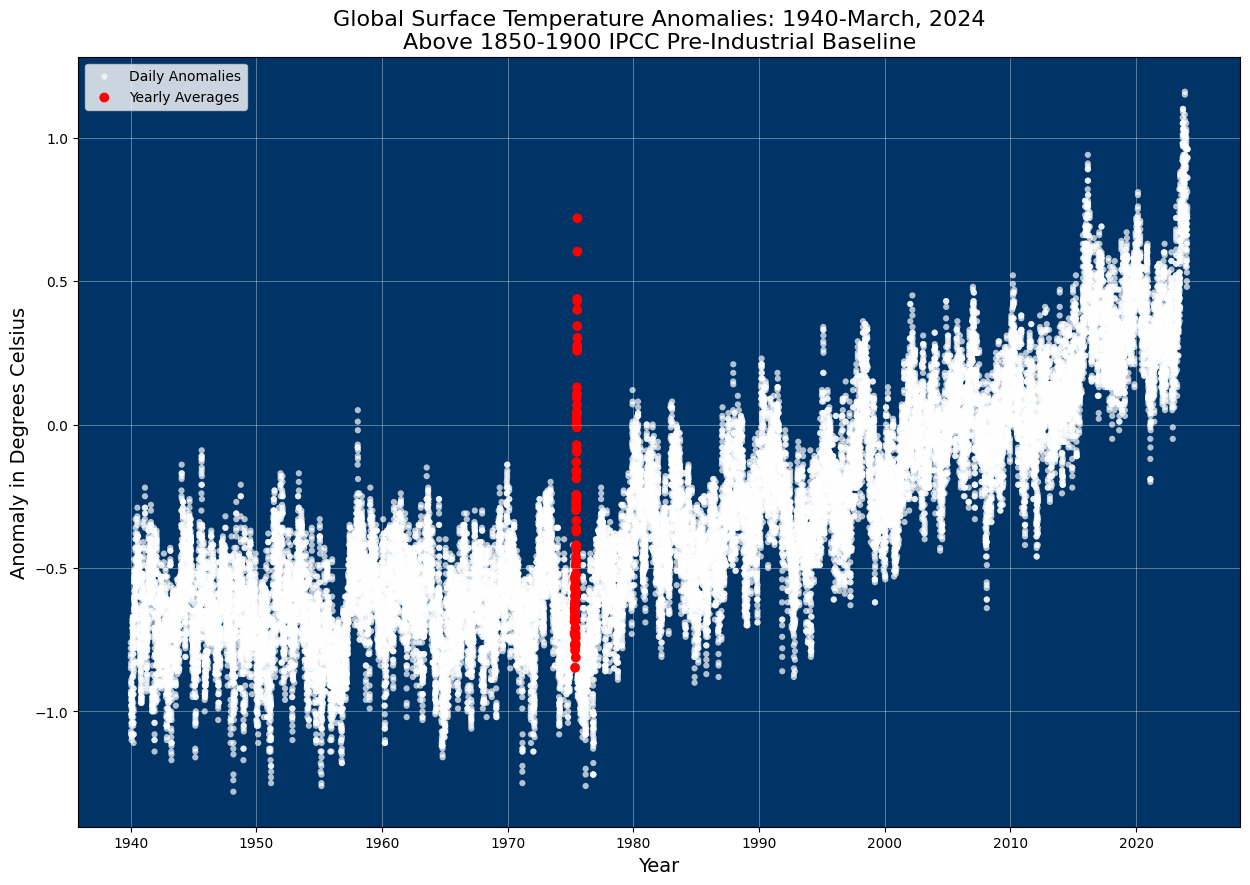

In [9]:
# Convert the 'date' column to datetime format and extract the year
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

# Calculate the yearly average anomalies
yearly_averages = data.groupby('year')['ano_91-20'].mean().reset_index()

# Plot the daily anomalies
plt.figure(figsize=(15, 10))
plt.scatter(data['date'], data['ano_91-20'], color='white', edgecolors='none', s=20, alpha=0.7, label='Daily Anomalies')

# Plot the yearly average anomalies
# Make sure that the x-values are the unique years and y-values are the corresponding yearly averages
plt.scatter(yearly_averages['year'], yearly_averages['ano_91-20'], color='red', edgecolors='none', s=50, label='Yearly Averages')

# Title and labels
plt.title('Global Surface Temperature Anomalies: 1940-March, 2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Anomaly in Degrees Celsius', fontsize=14)

# Add a legend
plt.legend()

# Set the grid and background
plt.grid(True, which='both', color='white', linestyle='-', linewidth=0.5, alpha=0.5)
plt.gca().set_facecolor('#003366')  # Dark blue background color

# Show the plot
plt.show()

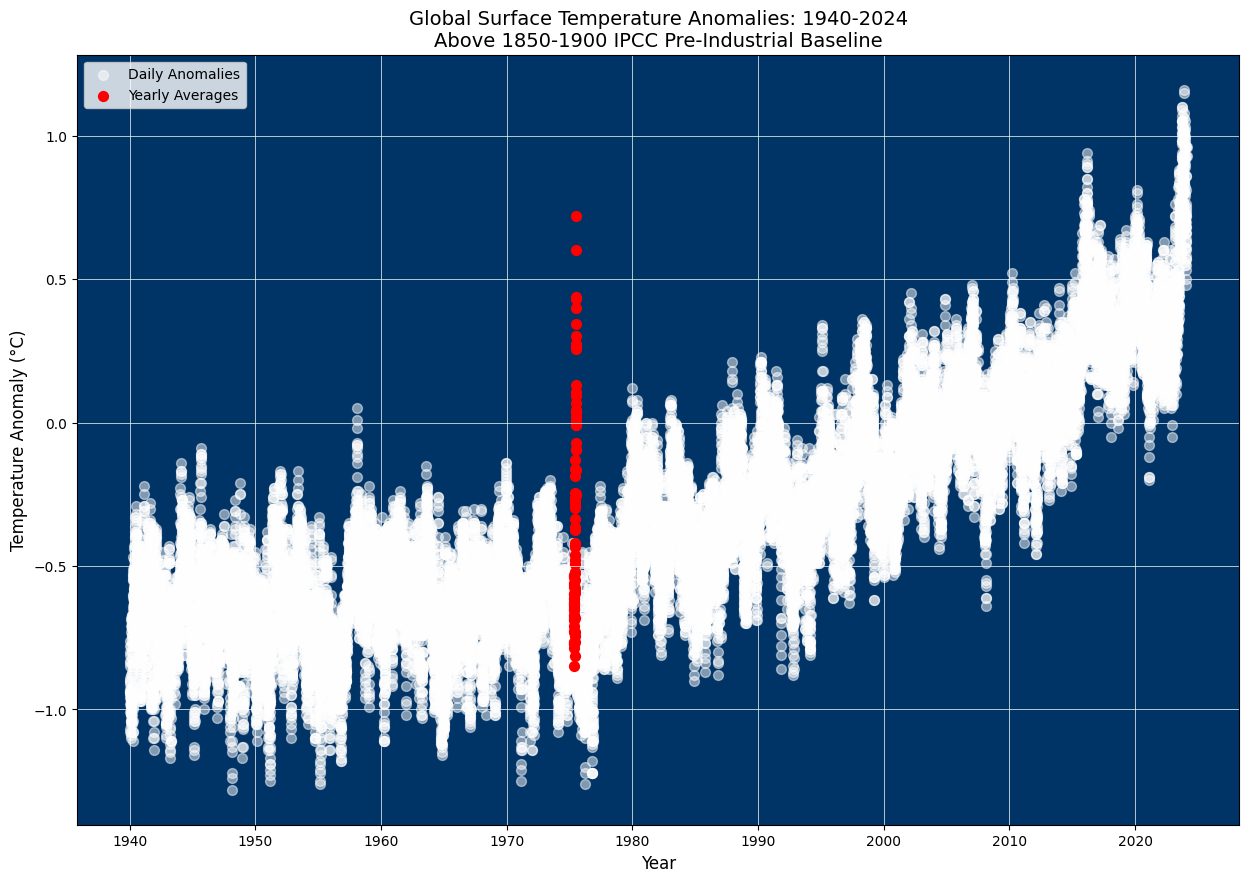

In [8]:
# Convert the date column to datetime objects and extract the year
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

# Group the data by year and calculate the mean anomaly for each year
yearly_average_anomalies = data.groupby('year')['ano_91-20'].mean().reset_index()

# Now plot the original data (daily anomalies) in white
plt.figure(figsize=(15, 10))
plt.scatter(data['date'], data['ano_91-20'], alpha=0.5, color='white', s=50, label='Daily Anomalies')

# Plot the yearly averages in red
plt.scatter(yearly_average_anomalies['year'], yearly_average_anomalies['ano_91-20'], color='red', s=50, label='Yearly Averages')

# Title and labels
plt.title('Global Surface Temperature Anomalies: 1940-2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)

# Adding the legend
plt.legend()

# Grid and background style
plt.grid(visible=True, which='major', linestyle='-', linewidth=0.5, color='white')
plt.gca().set_facecolor('#003366')  # Set the background color to navy blue

# Display the plot
plt.show()

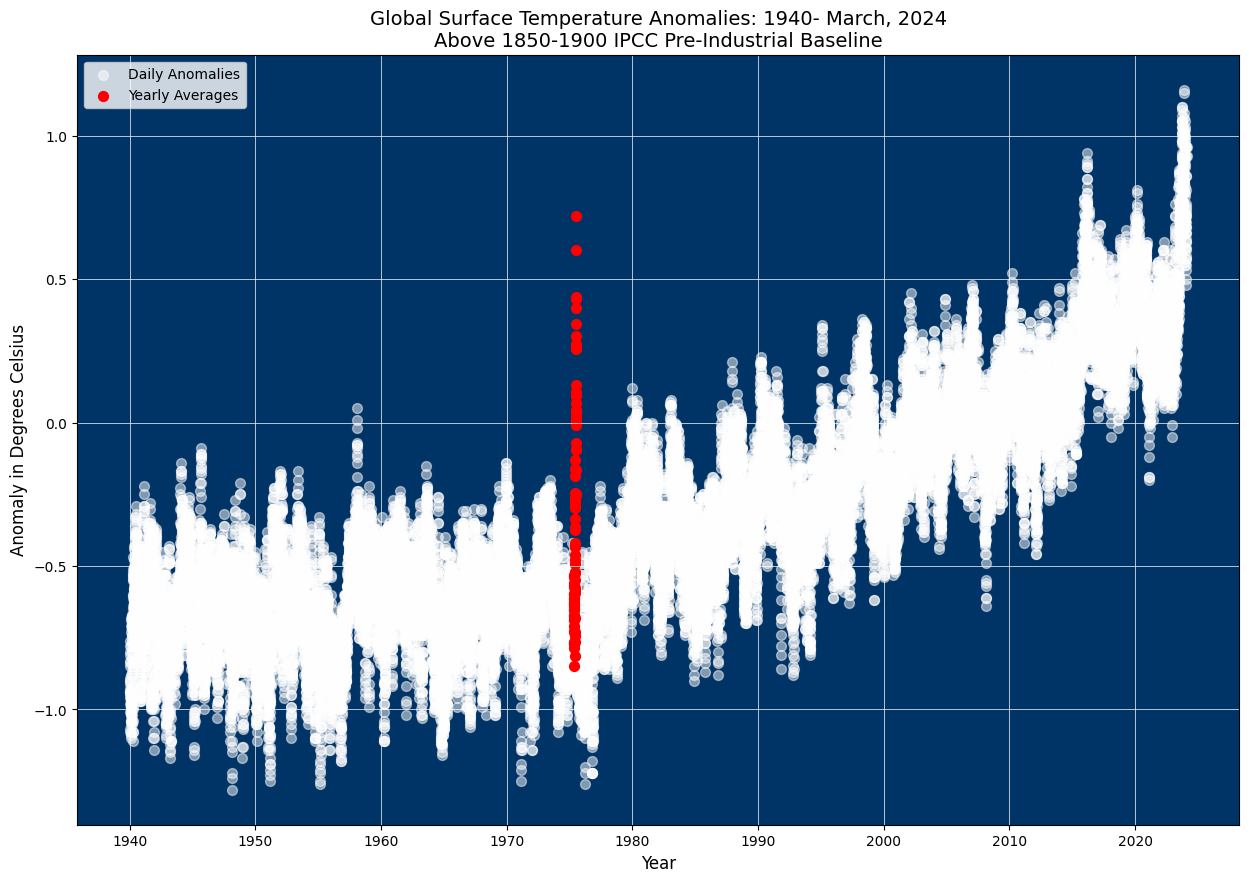

In [7]:
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from date
data['year'] = data['date'].dt.year

# Group by year and calculate mean anomaly
yearly_averages = data.groupby('year')['ano_91-20'].mean().reset_index()

# Now plot the original data in white
plt.figure(figsize=(15, 10))
plt.scatter(data['date'], data['ano_91-20'], alpha=0.5, color='w', s=50, label='Daily Anomalies')

# Plot the yearly average anomalies in red
plt.scatter(yearly_averages['year'], yearly_averages['ano_91-20'], color='red', s=50, label='Yearly Averages')

# Title and labels
plt.title('Global Surface Temperature Anomalies: 1940- March, 2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Anomaly in Degrees Celsius', fontsize=12)

# Adding legend
plt.legend()

# Grid and style
plt.grid(visible=True, which='major', color='w', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#003366')
plt.show()

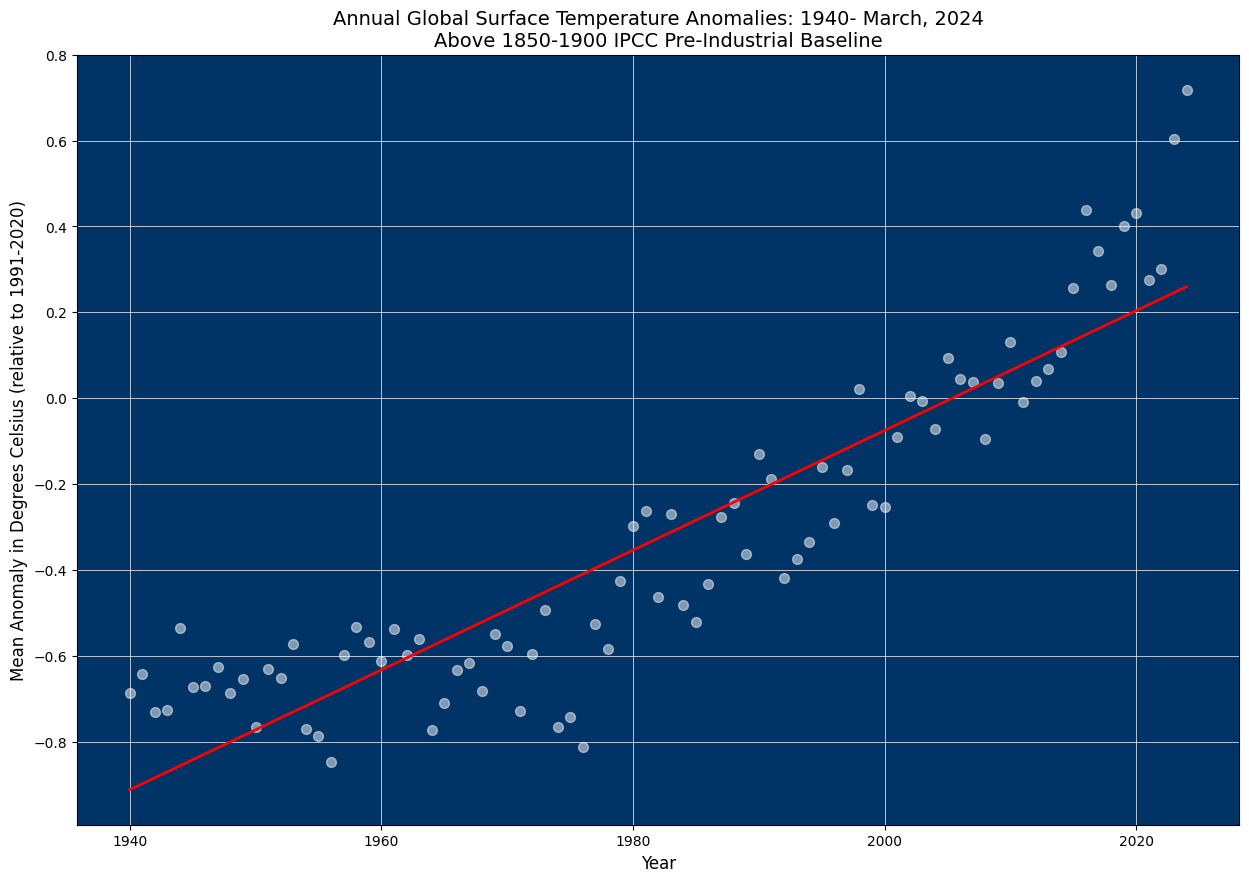

In [6]:
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from date
data['year'] = data['date'].dt.year

# Group by year and calculate mean anomaly
yearly_data = data.groupby('year')['ano_91-20'].mean().reset_index()

# Perform linear regression on the yearly averages
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['year'], yearly_data['ano_91-20'])

# Create a line of best fit
best_fit = intercept + slope * yearly_data['year']

# Now plot the data
plt.figure(figsize=(15, 10))
plt.scatter(yearly_data['year'], yearly_data['ano_91-20'], alpha=0.5, color='w', s=50)
plt.plot(yearly_data['year'], best_fit, color='red', linewidth=2)
plt.title('Annual Global Surface Temperature Anomalies: 1940- March, 2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Anomaly in Degrees Celsius (relative to 1991-2020)', fontsize=12)
plt.grid(visible=True, which='major', color='w', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#003366')
plt.show()

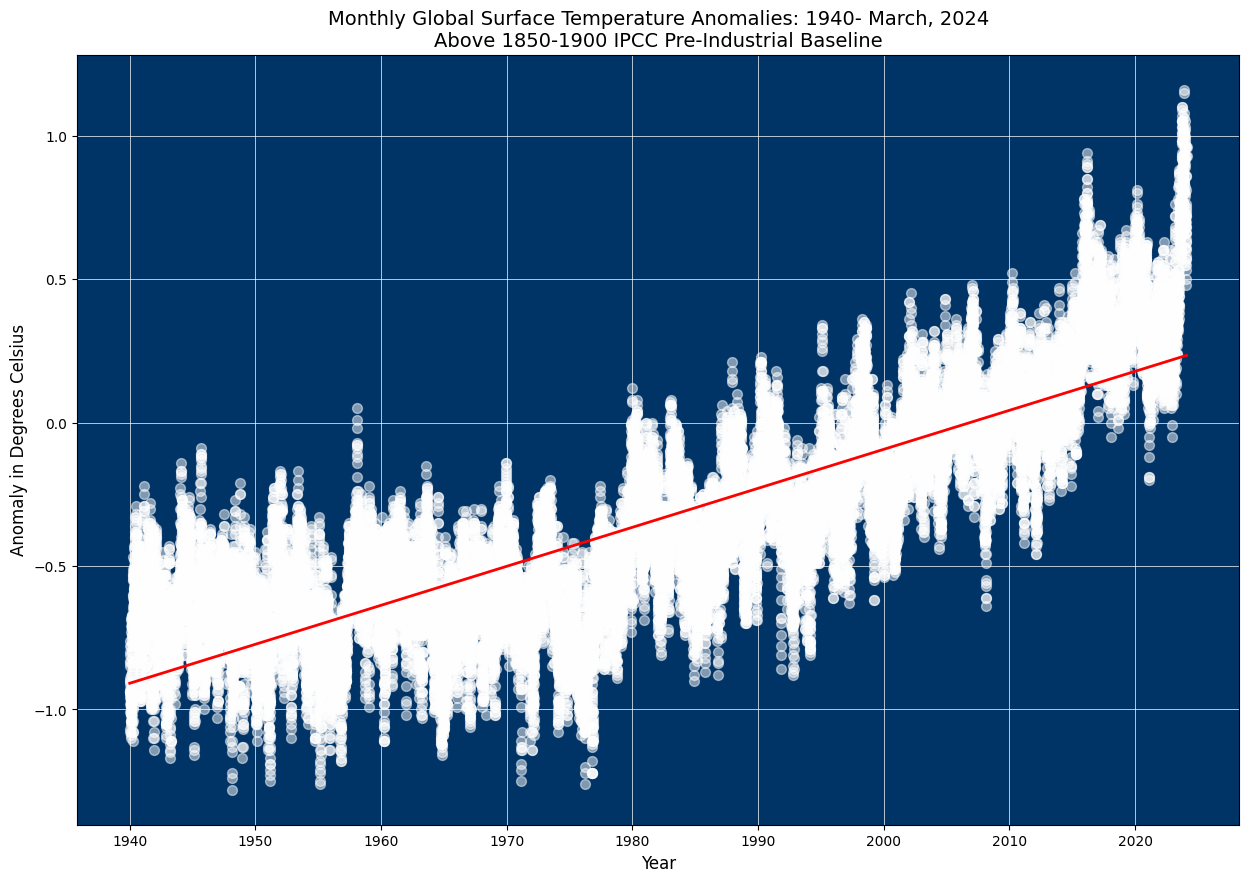

In [5]:
# Read the data from the CSV file directly
try:
    # Read the dataset into a pandas dataframe
    #data = pd.read_csv(data_url, comment='#')
    
    # Convert the date column to datetime
    data['date'] = pd.to_datetime(data['date'])
    
    # Use the 'ano_91-20' column for anomalies
    anomalies = data['ano_91-20']
    dates = data['date']
    
    # Perform linear regression on the anomalies
    slope, intercept, r_value, p_value, std_err = linregress(range(len(anomalies)), anomalies)
    
    # Create a line of best fit
    best_fit = intercept + slope * np.arange(len(anomalies))
    
    # Now plot the data
    plt.figure(figsize=(15, 10))
    plt.scatter(dates, anomalies, alpha=0.5, color='w', s=50)
    plt.plot(dates, best_fit, color='red', linewidth=2)
    plt.title('Monthly Global Surface Temperature Anomalies: 1940- March, 2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Anomaly in Degrees Celsius', fontsize=12)
    plt.grid(visible=True, which='major', color='w', linestyle='-', linewidth=0.5)
    plt.gca().set_facecolor('#003366')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")


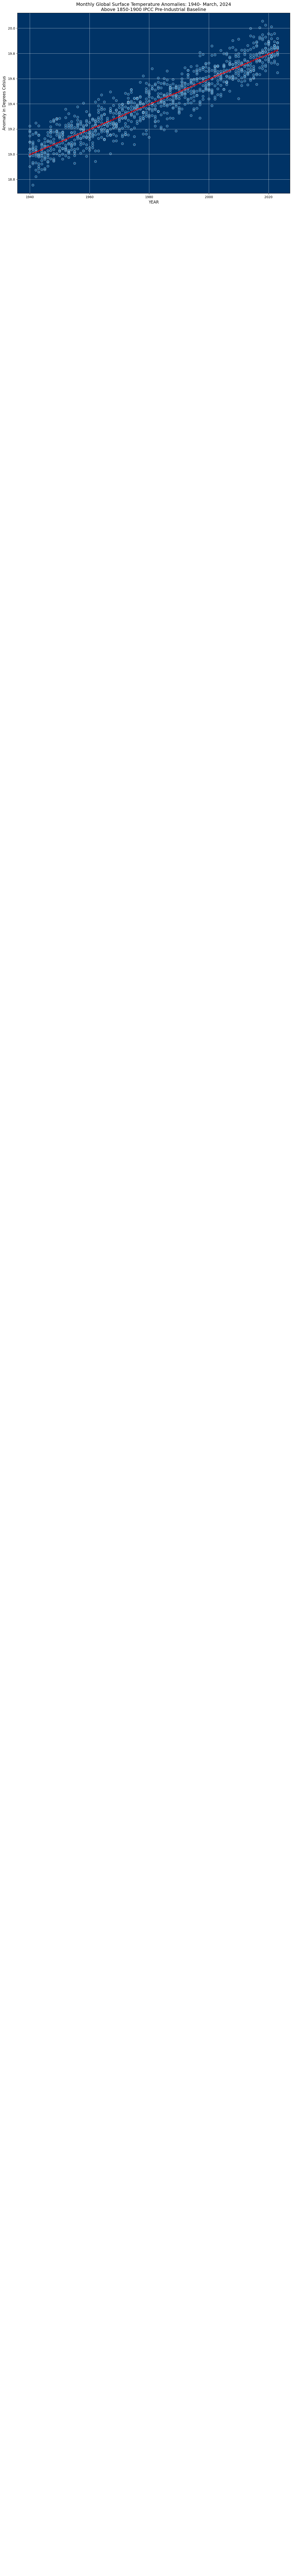

In [2]:
# Since we don't have the actual data, let's create some synthetic data to mimic the plot
np.random.seed(0)  # for reproducibility

# Generate a time series from 1940 to March 2024
years = np.arange(1940, 2024)
months = np.arange(1, 13)
year_month = [(y, m) for y in years for m in months]

# Truncate the last 9 months for 2024 (since it only goes until March)
#year_month = year_month[:-9]

# Create synthetic monthly temperature anomalies
# Let's assume a linear trend with some noise
slope = 0.01  # increase per year
intercept = -0.4  # starting value in 1940
trend = np.array([intercept + slope * year for year, _ in year_month])

# Add some random noise to simulate monthly variation
noise = np.random.normal(scale=0.1, size=len(trend))
temperature_anomalies = trend + noise

# Convert to DataFrame for ease of plotting
data = pd.DataFrame({
    'Year': [year for year, _ in year_month],
    'Month': [month for _, month in year_month],
    'Temperature_Anomaly': temperature_anomalies
})

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    data.index, data['Temperature_Anomaly']
)

# Create a line of best fit
data['Best_Fit'] = intercept + slope * data.index

# Now let's plot it
plt.figure(figsize=(15, 10))
plt.scatter(data['Year'], data['Temperature_Anomaly'], alpha=0.5, edgecolor='w', s=50)
plt.plot(data['Year'], data['Best_Fit'], color='red', linewidth=2)

# Setting the title and labels
plt.title('Monthly Global Surface Temperature Anomalies: 1940- March, 2024\nAbove 1850-1900 IPCC Pre-Industrial Baseline', fontsize=14)
plt.xlabel('YEAR', fontsize=12)
plt.ylabel('Anomaly in Degrees Celsius', fontsize=12)

# Adding the source text at the bottom left
plt.text(1940, -0.2, 'ERA5 Data: https://sites.ecmwf.int/data/climatepuse/data/series/era5_daily_series_2t_global.csv\n@eliotjacobson', fontsize=8, color='white')

# Show grid and set the style
plt.grid(visible=True, which='major', color='w', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#003366')  # Navy blue background
plt.show()